## Load the experiment data.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.sparse import linalg

## Devide dataset. 

In [9]:
data = load_svmlight_file('housing_scale', n_features=13) #The number of features to use.
print(data[0])
print(data[1])

#Divide dataset into training set and validation set using train_test_split function. 
X_train, X_validation, y_train, y_validation= train_test_split(data[0], data[1], test_size=0.2, random_state=666)

  (0, 0)	-1.0
  (0, 1)	-0.64
  (0, 2)	-0.86437
  (0, 3)	-1.0
  (0, 4)	-0.37037
  (0, 5)	0.155011
  (0, 6)	0.283213
  (0, 7)	-0.461594
  (0, 8)	-1.0
  (0, 9)	-0.583969
  (0, 10)	-0.425532
  (0, 11)	1.0
  (0, 12)	-0.82064
  (1, 0)	-0.999528
  (1, 1)	-1.0
  (1, 2)	-0.515396
  (1, 3)	-1.0
  (1, 4)	-0.654321
  (1, 5)	0.0959954
  (1, 6)	0.565396
  (1, 7)	-0.302076
  (1, 8)	-0.913043
  (1, 9)	-0.790076
  (1, 10)	0.106383
  (1, 11)	1.0
  :	:
  (504, 1)	-1.0
  (504, 2)	-0.159091
  (504, 3)	-1.0
  (504, 4)	-0.226337
  (504, 5)	0.238935
  (504, 6)	0.779609
  (504, 7)	-0.770972
  (504, 8)	-1.0
  (504, 9)	-0.671756
  (504, 10)	0.787234
  (504, 11)	0.982601
  (504, 12)	-0.737859
  (505, 0)	-0.999076
  (505, 1)	-1.0
  (505, 2)	-0.159091
  (505, 3)	-1.0
  (505, 4)	-0.226337
  (505, 5)	-0.0538417
  (505, 6)	0.604531
  (505, 7)	-0.749857
  (505, 8)	-1.0
  (505, 9)	-0.671756
  (505, 10)	0.787234
  (505, 11)	1.0
  (505, 12)	-0.660596
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 

## Select a Loss function.

In [10]:
#Select a Loss function and calculate the value of the Loss function of the training set,denoted as Loss.
def L2Loss(y, y_):
    return ((y-y_)**2)

def L1Loss(y, y_):
    return np.abs(y-y_)

Loss = L2Loss

## Initialize parameters.

In [15]:
#Initialize linear model parameters with normal distribution.
w = np.random.normal(size=(13))
print(w)
print(X_train)
#dot product
prediction_init = X_train.dot(w)
loss_init = Loss(pred_init, y_train)
print('mean(loss) = {}'.format(loss_init.mean()))

[-0.50274675 -0.79465372  0.44103497 -0.61460224  0.91256211  0.56422063
 -0.56978586  0.65398602  0.61942192  1.4130219   0.665738   -0.40014317
  2.81338958]
  (0, 0)	-0.999272
  (0, 1)	0.05
  (0, 2)	-0.643695
  (0, 3)	-1.0
  (0, 4)	-0.917695
  (0, 5)	0.0147538
  (0, 6)	-0.415036
  (0, 7)	0.125335
  (0, 8)	-0.565217
  (0, 9)	-0.59542
  (0, 10)	-0.148936
  (0, 11)	1.0
  (0, 12)	-0.701435
  (1, 0)	-0.915282
  (1, 1)	-1.0
  (1, 2)	0.293255
  (1, 3)	-1.0
  (1, 4)	0.111111
  (1, 5)	-0.0837325
  (1, 6)	0.684861
  (1, 7)	-0.683202
  (1, 8)	1.0
  (1, 9)	0.828244
  (1, 10)	0.617021
  (1, 11)	-0.890615
  :	:
  (402, 1)	-1.0
  (402, 2)	0.293255
  (402, 3)	-1.0
  (402, 4)	0.296296
  (402, 5)	-0.581912
  (402, 6)	1.0
  (402, 7)	-0.938601
  (402, 8)	1.0
  (402, 9)	0.828244
  (402, 10)	0.617021
  (402, 11)	1.0
  (402, 12)	0.465232
  (403, 0)	-0.98844
  (403, 1)	-1.0
  (403, 2)	-0.579179
  (403, 3)	1.0
  (403, 4)	-0.497942
  (403, 5)	0.176471
  (403, 6)	0.515963
  (403, 7)	-0.451045
  (403, 8)	-0.39

## Closed-form solution.

In [16]:
#closed-form solution
w = linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
print(w)

[-12.89846168   2.11697736  -0.16889706   0.37318817  -5.83812818
   9.66599555   0.86771473 -11.03211998   4.38671459  -2.86453302
  -4.72490141   2.63947781 -10.13965855]


## Print the value.

In [19]:
#loss value in train set
prediction_train = X_train.dot(w)
loss_train = Loss(prediction_train, y_train)
print('mean(loss_train) = {}'.format(loss_train.mean()))

mean(loss_train) = 23.726942024006856


In [20]:
#loss value in validation set
prediction_val = X_validation.dot(w)
loss_val = Loss(prediction_val, y_validation).mean()
print('mean(loss_val) = {}'.format(loss_val.mean()))

mean(loss_val) = 27.20850718361351


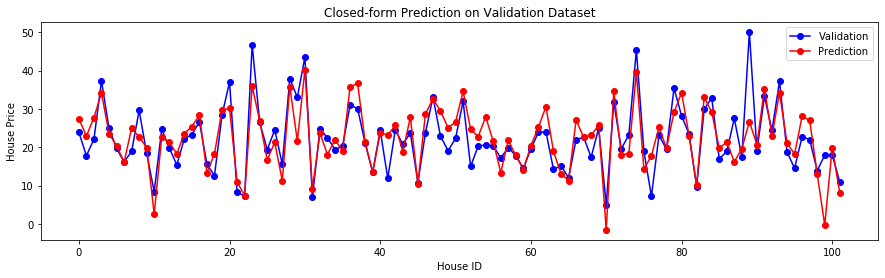

In [22]:
plt.figure(figsize=[15,4])
plt.title('Closed-form Prediction on Validation Dataset')
plt.xlabel('House ID')
plt.ylabel('House Price')
plt.plot(y_validation, marker='o', c='b', label='Validation')
plt.plot(prediction_val, marker='o', c='r', label='Prediction')
plt.legend()
plt.show()